<a href="https://colab.research.google.com/github/binarymath/Studying_TensorFlow2/blob/main/TF2_0_ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Install TensorFlow

import tensorflow as tf
print(tf.__version__)

2.12.0


In [6]:
# Other imports

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [8]:
# Make the dataset

In [25]:
N = 1000
X = np.random.random((N,2)) * 6 - 3 # uniformly distribuited between (-3, +3)
Y = np.cos(2*X[:,0])+np.cos(3*X[:,1])

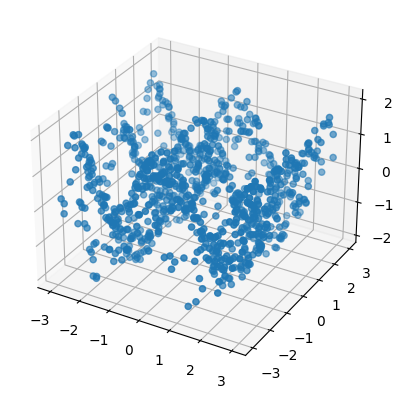

In [26]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

#plt.show()


In [27]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)
])

In [29]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.9096
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8597
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8373
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7974
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7592
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7359
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6716
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6457
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5689
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5768
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5495
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5385
Epoch 13/100
32/32 [=================

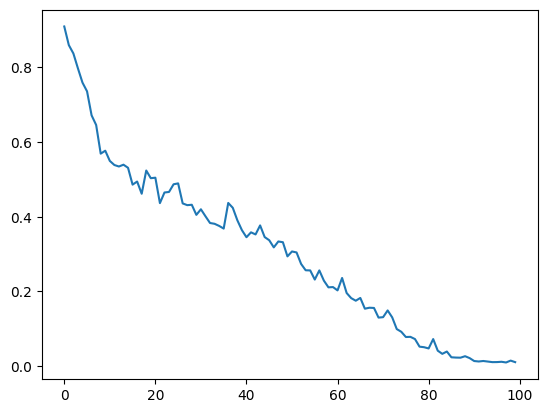

In [30]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

In [31]:
# Compile and fit

79/79 [==============================] - 0s 1ms/step


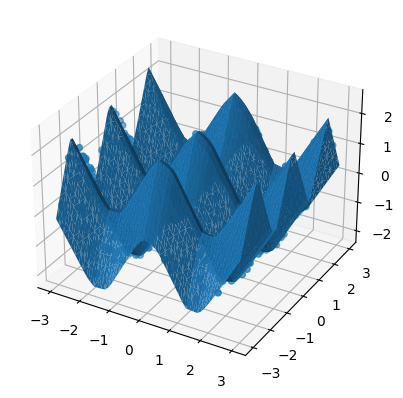

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True
)
plt.show()